In [ ]:
!python -m pip install deepface

In [ ]:
import os
from deepface import DeepFace
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
!cp "/content/drive/MyDrive/Colab Notebooks/ISL_team_exercises/datathon_202312/faceimages.zip" .

In [ ]:
!unzip faceimages.zip

In [ ]:
def getgender(gender_results):
    gender = max(gender_results, key=gender_results.get)
    return gender

def getrace(race_results):
    race = max(race_results, key=race_results.get)
    return(race)

In [ ]:

def getAnalysis(backends, folder, csvfilename, postfix='png'):
    #facial analysis
    imagelist = os.listdir(folder)
    imagelist = sorted([x for x in imagelist if x.endswith(postfix)])
    with open(csvfilename, 'w') as f:
        f.write("filename, gender, race, age\n")

        for image in imagelist:
            # in case we cant detect face, set age, race and gender to unknown versions.
            # if we do detect a face, those will get overwritten.
            age = -1
            race = 'unknown'
            gender = 'unknown'

            try:
                demographies = DeepFace.analyze(img_path = os.path.join(folder, image),
                    detector_backend = backends, actions = ['age', 'gender', 'race'])[0]
                age = demographies['age']
                gender = getgender(demographies['gender'])
                race = getrace(demographies['race'])

            except:
                print(f"unable to detect face in {image}")
                img = Image.open(os.path.join(folder, image))
                plt.imshow(img)
                plt.show()

            f.write(f'{image}, {gender}, {race}, {age}\n')
            #print(f'{image}, {gender}, {race}, {age}\n')

Action: race: 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]


unable to detect face in 00291.png


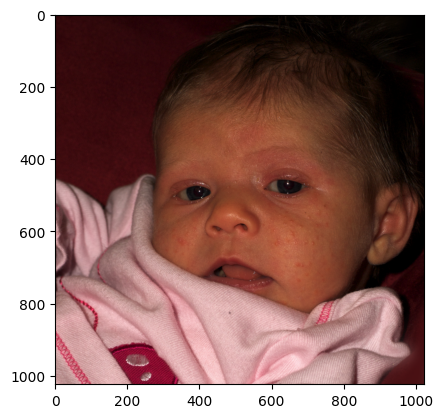

Action: race: 100%|██████████| 3/3 [00:01<00:00,  1.53it/s]


unable to detect face in 00294.png


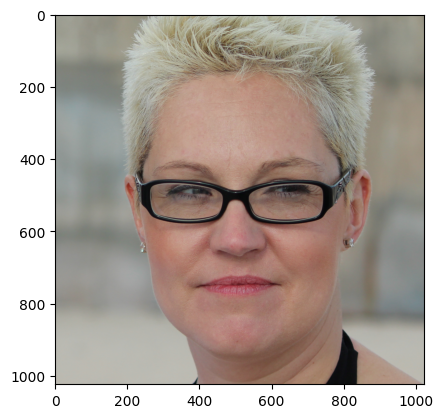

Action: race: 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]


unable to detect face in 00359.png


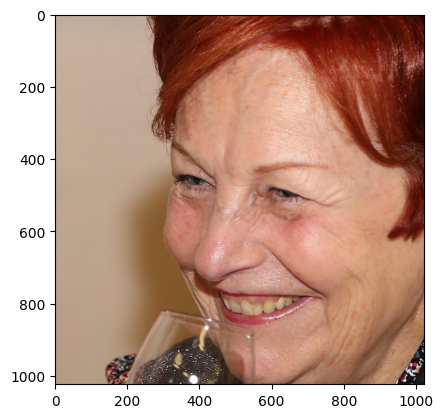

Action: race: 100%|██████████| 3/3 [00:02<00:00,  1.41it/s]


unable to detect face in 00362.png


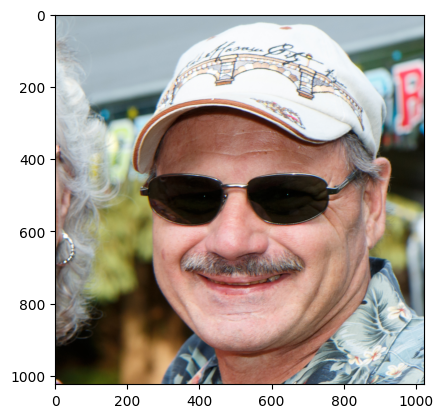

Action: race: 100%|██████████| 3/3 [00:01<00:00,  1.52it/s]


unable to detect face in 00366.png


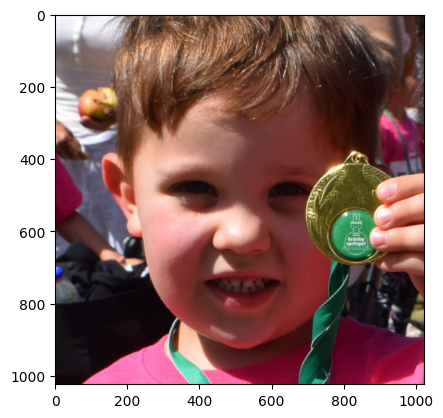

Action: race: 100%|██████████| 3/3 [00:02<00:00,  1.41it/s]


unable to detect face in 00369.png


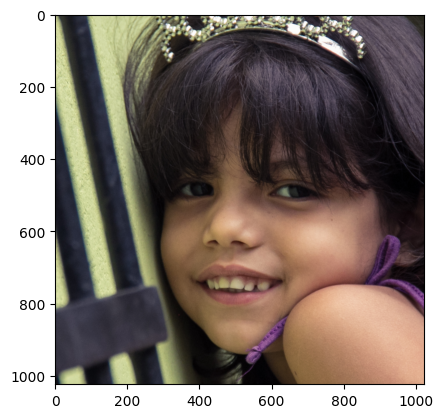

Action: race: 100%|██████████| 3/3 [00:02<00:00,  1.39it/s]


unable to detect face in 00411.png


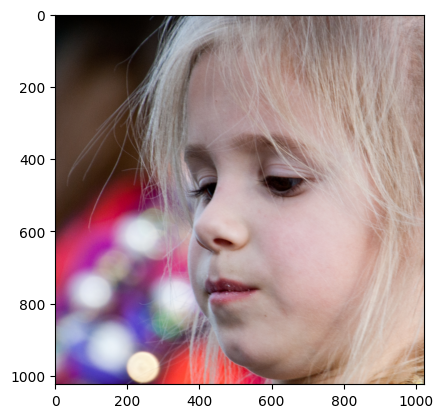

Action: race: 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]


unable to detect face in 00450.png


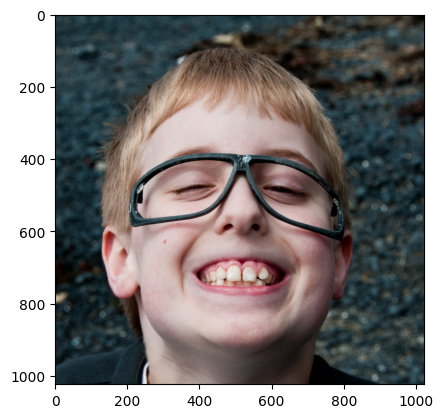

In [ ]:
backends = 'opencv'
image_folder = 'faceimages'
csvfilename = "deepface_analysis_results.csv"

getAnalysis(backends, image_folder, csvfilename)